---------------

 <font color = 'green'> **Problem-Statement**

**Predicting the risk of CHD ten years in advance.**

Framingham Heart Study - In 1948, scientists and participants embarked on an ambitious project to identify risk factors for heart disease. Today, the study remains a world-class epicenter for cutting-edge heart, brain, bone, and sleep research.
The 10-year cardiovascular risk of an individual can be estimated with the Framingham Risk Score, including for individuals without known cardiovascular disease. The Framingham Risk Score is based on findings of the Framingham Heart Study.


<font color = 'green'> **Attribute Information**
Variables used in this study:-
- **Demographic Variables** - Gender, Age in Years, Education.
- **Behavioral Factors** - Current Smoker, No. of cigarettes per day.
- **Medical History** - BP Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes

In addition, data from the first medical examination was taken into account. This
included: Total Cholesterol, Blood Pressure, BMI, Heart Rate, and Glucose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<font size=3> Perform Necessary Exploratory Data Analysis.

In [3]:
# lets check top few records to get a feel of the data structure
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# lets check basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# lets check statistical summary of the data.
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64


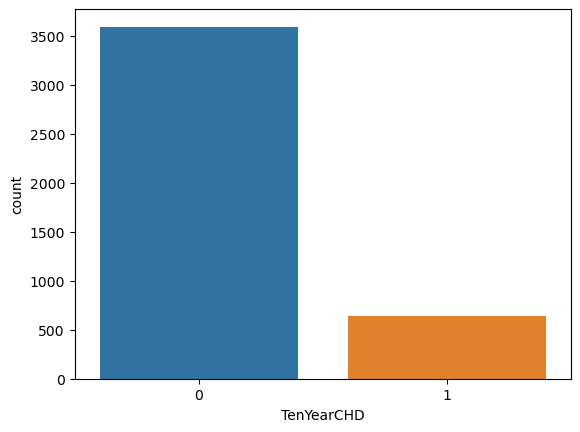

In [6]:
# Lets check the distrution of the target variable
print(df['TenYearCHD'].value_counts(normalize = True)*100)
sns.countplot(df['TenYearCHD']);

<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [7]:
# Are there any missing values ?
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
# Lets impute missing values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
       
df.isnull().sum()        

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<font size=3> Q. Check for duplicate records and drop them.

In [9]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<font size=3> Q. Check for the presence of outliers and handle them with appropriate techniques.

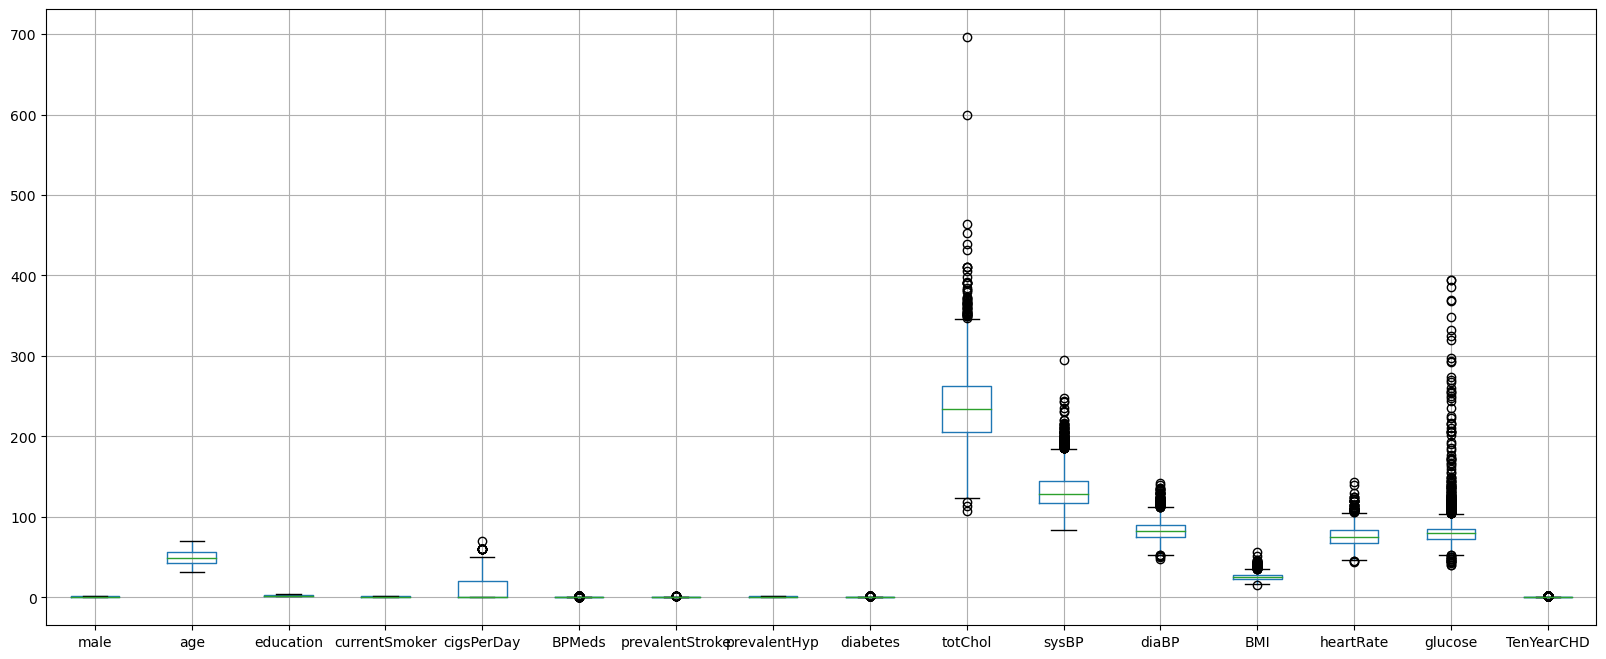

In [10]:
df.boxplot(figsize = (20,8));

In [11]:
# Lets define a function to treat the outliers using IQR approach
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [12]:
for column in df[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] > ur,ur,df[column])
    df[column] = np.where(df[column] < lr,lr,df[column])

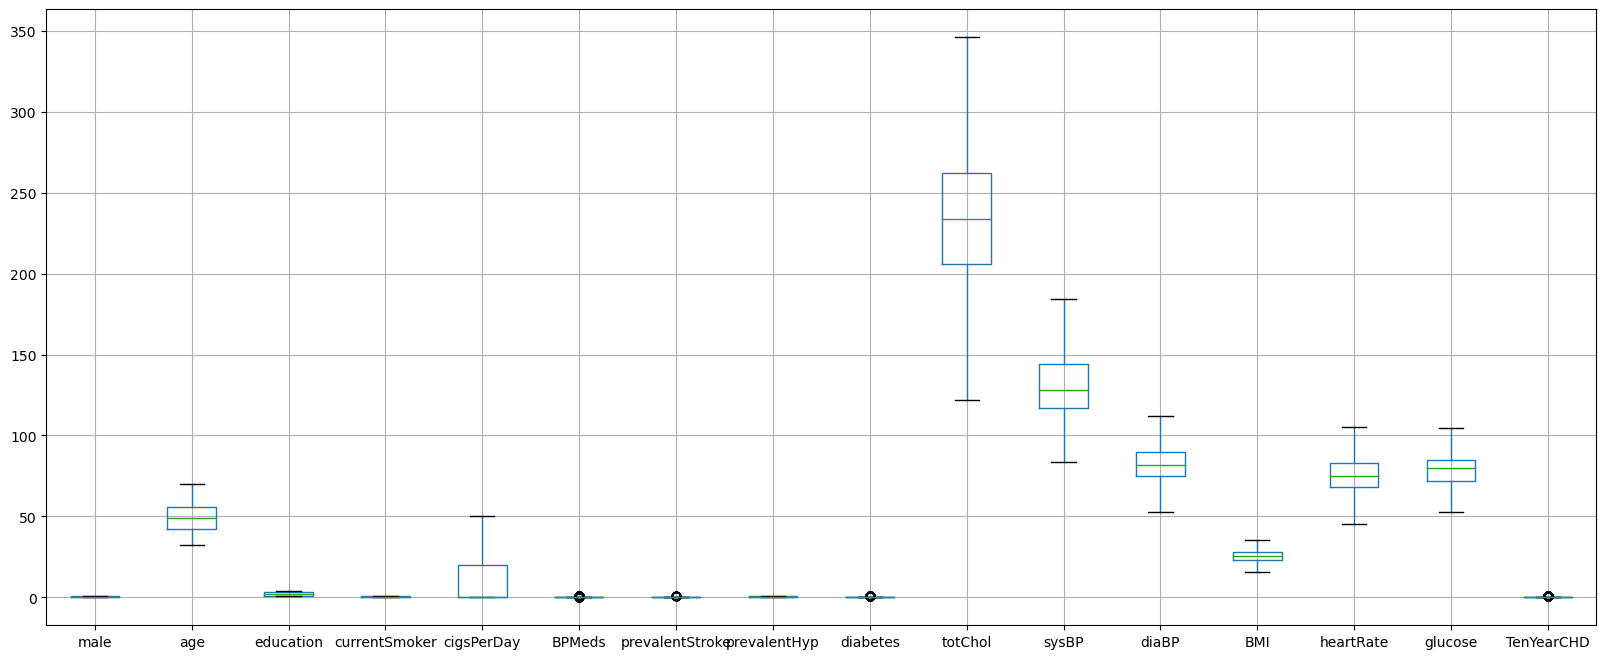

In [13]:
df.boxplot(figsize = (20,8));

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [14]:
X = df.drop('TenYearCHD', axis = 1) # Copy all the predictor variables into X dataframe
y = df[['TenYearCHD']] # Copy target into the y dataframe.

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

<font size=3> Q. Scale the data using appropriate approach.

In [15]:
## Scaling the data
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [16]:
X_train.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3491,1.154814,0.501417,-0.960511,1.021127,-0.498804,-0.174858,-0.080295,-0.674795,-0.162165,-1.481814,-0.543510,-0.336160,0.135750,-0.082070,-1.033822
3144,-0.865940,2.019926,0.033361,-0.979310,-0.753062,5.785891,-0.080295,1.481931,-0.162165,1.376760,1.841109,0.550172,2.541178,-0.850624,-1.475672


In [17]:
X_test.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
906,1.154814,0.384609,-0.960511,-0.97931,-0.753062,-0.174858,-0.080295,-0.674795,-0.162165,-0.380560,-0.251516,-0.602060,-0.374812,-0.082070,-0.503602
857,-0.865940,-0.666666,-0.960511,-0.97931,-0.753062,-0.174858,-0.080295,-0.674795,-0.162165,-0.966334,-0.689507,0.284272,-0.685359,-0.509044,-0.415232


<font size=3> Q. Buid a logistic regression model and evaluate the model performance.

In [18]:
# Create an instance
log_reg = LogisticRegression()
# Learning
log_reg.fit(X_train,y_train)

LogisticRegression()

In [19]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [20]:
# Print the intercept of the model and the coefficients of the features
print('Intercept of the logistic model fitted is: ',log_reg.intercept_)
print('Coefficients of the features are: ',log_reg.coef_)

Intercept of the logistic model fitted is:  [-1.90282309]
Coefficients of the features are:  [[ 0.31675505  0.4931904  -0.07746624  0.01082206  0.21100343  0.07358973
   0.08477034  0.04178368  0.15031726  0.10495877  0.37715192 -0.0981608
   0.00707476  0.01102319  0.05944031]]


In [21]:
# Check for accuray of the model
metrics.accuracy_score(y_test,y_pred)

0.8687106918238994

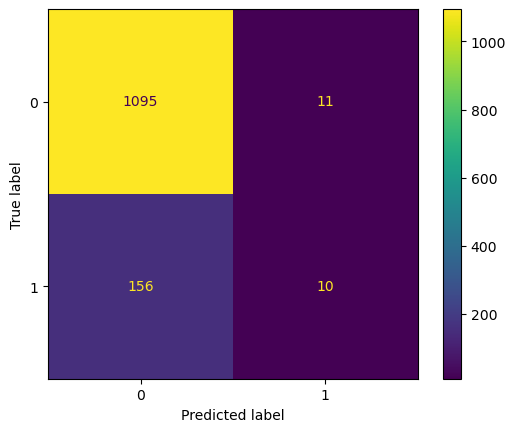

In [22]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

In [23]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1106
           1       0.48      0.06      0.11       166

    accuracy                           0.87      1272
   macro avg       0.68      0.53      0.52      1272
weighted avg       0.82      0.87      0.82      1272



- **We see that accuracy is 0.86, but recall, f1-score for class-1 is quite low due to class imbalance Hence the model is not a good one largely because of dataset.**

Area under ROC is : 0.7153151484781803


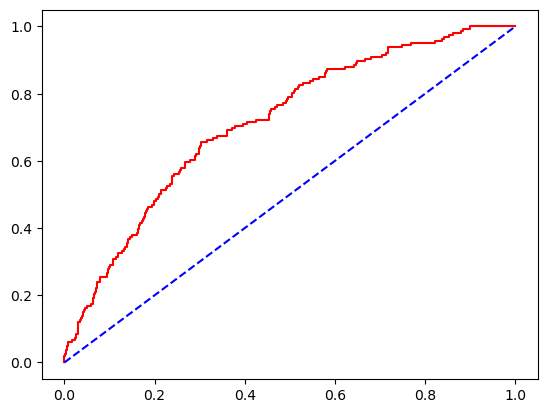

In [24]:
# ROC Curve  - Reiever operating Characteristic 
y_score1 = log_reg.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, thresh1 = roc_curve(y_test, y_score1)
print('Area under ROC is :', roc_auc_score(y_test, y_score1))
plt.plot(fpr1, tpr1, color = "Red")
plt.plot([0,1], [0,1], color = 'Blue', linestyle='--')
plt.show()